In [71]:
import thicket as th
from glob import glob

files = glob("group-cali-files/**/*.cali")
data = th.Thicket.from_caliperreader(files)

(2/2) Creating Thicket: 100%|██████████| 1077/1077 [00:17<00:00, 60.27it/s]


In [72]:

data.metadata_columns_to_perfdata("input_size")
data.metadata_columns_to_perfdata("num_procs")
data.metadata_columns_to_perfdata("input_type")
data.metadata_columns_to_perfdata("algorithm")
data.metadata_columns_to_perfdata("cmdline")
data.metadata_columns_to_perfdata("opts:output")

# data.metadata[(data.metadata['opts:output'] == 'cali-files/28-2-2-0.cali')]
# data.metadata

In [73]:
df = data.dataframe.reset_index()
# df = df.dropna()
df.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),...,Calls/rank (avg),Calls/rank (max),Calls (total),name,input_size,num_procs,input_type,algorithm,cmdline,opts:output
0,"{'name': 'main', 'type': 'function'}",12664303082,1.0,"(regionprofile,)",0.464183,0.46687,0.465527,0.931054,NaN,0.455143,...,NaN,NaN,NaN,main,262144,2,0,Merge Sort,"[./merge_sort, 18, 0, 0]",cali-files/18-2-0-0.cali
1,"{'name': 'main', 'type': 'function'}",30333244180,1.0,"(regionprofile,)",9.849330,9.93978,9.905130,10142.900000,0.000314,3.544270,...,NaN,NaN,NaN,main,16777216,1024,3,radix,"[./mpi_radix, 16777216, 3]",new-cali-files/16777216-1024-3.cali
2,"{'name': 'main', 'type': 'function'}",38047397660,1.0,"(regionprofile,)",1.091160,1.10689,1.095240,17.523800,0.000023,0.765481,...,NaN,NaN,NaN,main,4194304,16,0,radix,"[./mpi_radix, 4194304, 0]",new-cali-files/4194304-16-0.cali
3,"{'name': 'main', 'type': 'function'}",43085249982,1.0,"(regionprofile,)",1.047030,1.09993,1.064560,4.258240,NaN,0.941442,...,NaN,NaN,NaN,main,4194304,4,0,Merge Sort,"[./merge_sort, 22, 0]",cali-files/22-4-0-0.cali
4,"{'name': 'main', 'type': 'function'}",43661646994,1.0,"(regionprofile,)",0.927077,1.07363,1.006010,64.384500,NaN,0.001641,...,NaN,NaN,NaN,main,65536,64,random,sample-sort,"[./sample_sort_mpi, --n, 65536, --datatype, do...",./cali/64-65536-double-random.cali


In [74]:
print(data.tree(["Avg time/rank"]))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2025.1.0

0.466 main
├─ 0.001 data_init_runtime
├─ 0.009 comp
│  ├─ nan comp_large
│  ├─ 0.008 comp_small
│  └─ 0.001 comp_large
├─ 0.001 comm
│  ├─ 0.001 comm_large
│  ├─ nan comm_small
│  └─ nan comm_large
└─ 0.001 correctness_check

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.47 indices: {'profile': np.int64(12664303082)})
█ 0.42 - 0.47
█ 0.33 - 0.42
█ 0.23 - 0.33
█ 0.14 - 0.23
█ 0.05 - 0.14
█ 0.00 - 0.05

name User code    ◀  Only in left graph    ▶  Only in right graph



In [75]:
node_strings = ["comp_large", "comm", "main"]

## Strong Scaling Time Plots

In [86]:
import matplotlib.pyplot as plt
def plot_runtimes(x, ys, leg_labels, title, figname, inp_size):
    _, ax = plt.subplots()
    ax.plot(x, ys[0], 'x--', label=leg_labels[0], markersize=10)
    ax.plot(x, ys[1], '.--', label=leg_labels[1])
    ax.plot(x, ys[2], 'o--', label=leg_labels[2], fillstyle='none')
    # ax.plot(x, ys[3], 'p--', label=leg_labels[3], fillstyle='none')
    ax.set_xscale('log', base=2)
    ax.set_xlabel(f"Number of Processes (log 2 scaled)")
    ax.set_ylabel("Time (s)")
    ax.set_title(f"{title} Time Strong Scaling (Input Size={inp_size})")
    ax.legend()
    # plt.savefig(f"plots/strong-time/{figname}.png", dpi=600, bbox_inches="tight")
    plt.show()

Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
Merge Sort
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
radix
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
sample-sort
3


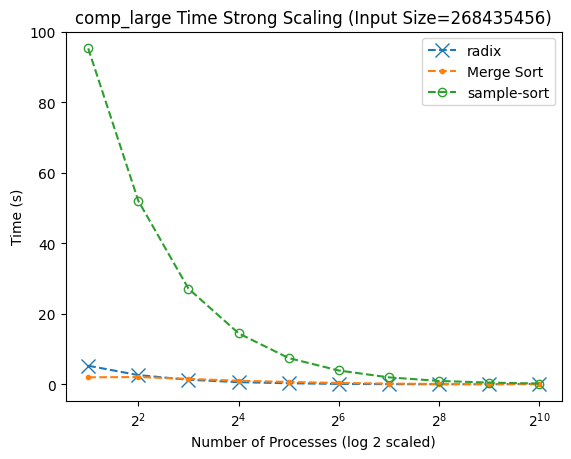

3


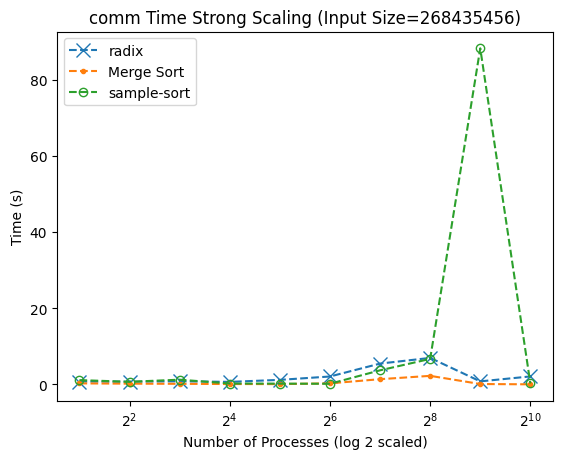

3


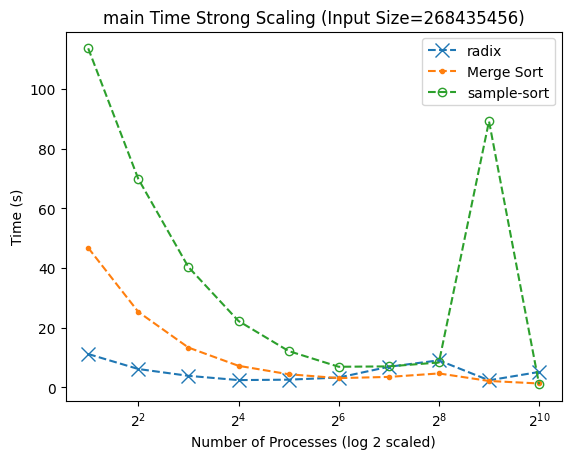

In [87]:
from copy import deepcopy


df = data.dataframe
df = df[df["Avg time/rank"].isna() == False]
data.dataframe = df

sub_data = data.groupby([ "algorithm", "input_size", "num_procs", "input_type"])
desired_size = 2**28
num_procs = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
algorithms = {"radix": [], "Merge Sort": [], "sample-sort" : []}

ys_time = {node : deepcopy(algorithms) for node in node_strings}

for cols, thic in sub_data.items():
    for node_string in node_strings:
        
        node = thic.get_node(node_string)
        algorithm = thic.dataframe.loc[node, "algorithm"].values[0]
        sort_level = thic.dataframe.loc[node, "input_type"].values[0]
        inp_size = int(thic.dataframe.loc[node, "input_size"].values.flatten()[0])
        name = thic.dataframe.loc[node, "name"].values[0]
        if sort_level == 'random':
            sort_level = 2
        if (inp_size != desired_size or sort_level!=2):
            continue
        print(algorithm)
        y_avg = float(thic.dataframe.loc[node, "Avg time/rank"].values.flatten()[0])
        ys_time[node_string][algorithm].append(y_avg)

for node_string in node_strings:
    leg_labels = list(ys_time[node_string].keys())
    ys = list(ys_time[node_string].values())
    print(len(ys))
    plot_runtimes(num_procs, ys, leg_labels, node_string, None, desired_size)

## Strong Scaling Speedup

In [88]:
def plot_speedup(x, ys, leg_labels, title, sort_level, figname):
    _, ax = plt.subplots()
    ax.plot(x, ys[0], 'x--', label=leg_labels[0], markersize=10)
    ax.plot(x, ys[1], '.--', label=leg_labels[1])
    ax.plot(x, ys[2], 'o--', label=leg_labels[2], fillstyle='none')
    # ax.plot(x, ys[3], 'p--', label=leg_labels[3], fillstyle='none')
    ax.set_xscale('log', base=2)
    ax.set_xlabel(f"Number of Processes (log 2 scaled)")
    ax.set_ylabel("Speedup Factor")
    ax.set_title(f"{title} Speedup Factor Strong Scaling (Sort Level={sort_level})")
    ax.legend()
    # plt.savefig(f"plots/strong-speedup/{figname}.png", dpi=600, bbox_inches="tight")
    plt.show()

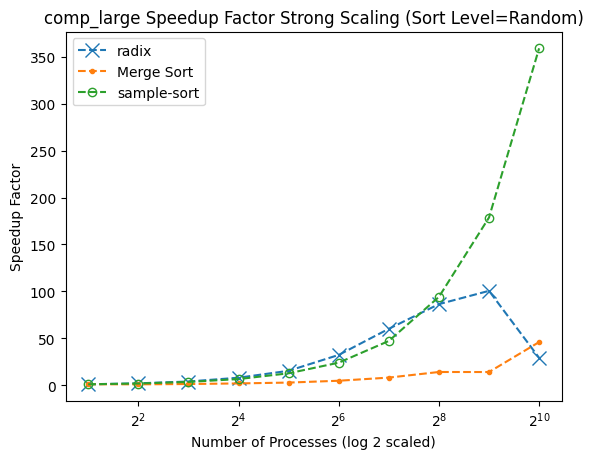

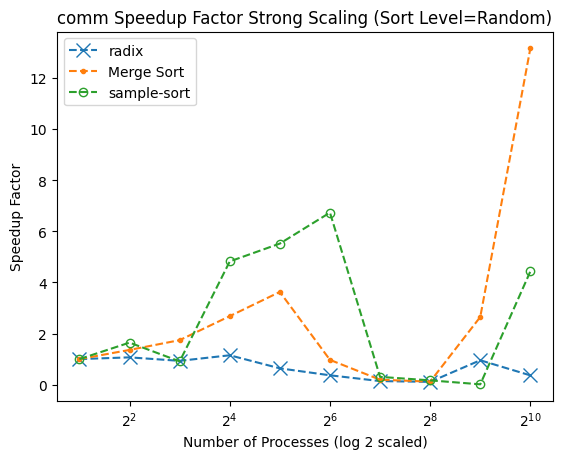

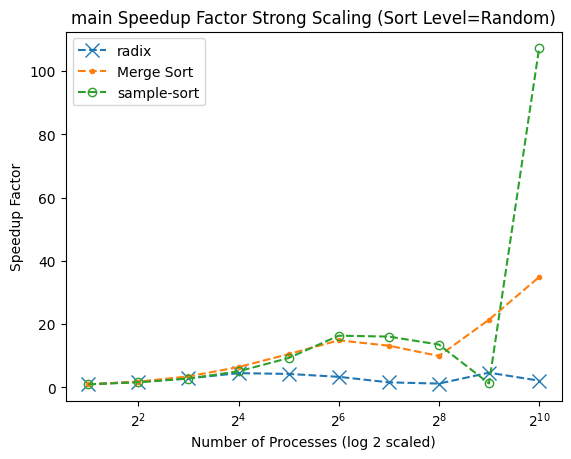

In [81]:
for node in node_strings:
    y_scaling = []
    for sort, times in ys_time[node].items():
        runtimes = times
        speedup = [runtimes[0]/x for x in runtimes]
        y_scaling.append(speedup)
    plot_speedup(num_procs, y_scaling, leg_labels, node, "Random", None)

In [ ]:
import matplotlib.pyplot as plt

df = data.dataframe
df = df[df["Avg time/rank"].isna() == False]
data.dataframe = df


def plot_runtimes_weak(x_proc, x_elem, ys, labels, title, sort_level, figname):
    """
    Plots weak scaling for two algorithms.

    Parameters:
    - x_proc: list of number of processes
    - x_elem: list of total number of elements
    - ys: list of two y-values lists [algo1_avg, algo2_avg]
    - labels: list of two algorithm names
    - title: region/node title
    - sort_level: e.g., 'Random'
    - figname: filename (unused if just showing)
    """
    _, ax = plt.subplots()
    ax2 = ax.twiny()

    # Plot two lines for the two algorithms
    ax.plot(x_elem, ys[0], 'x--', label=labels[0], markersize=10)
    ax.plot(x_elem, ys[1], 'o--', label=labels[1], markersize=8)
    ax.plot(x_elem, ys[2], 'o--', label=leg_labels[2], fillstyle='none')
    # Add invisible lines to link processes on top axis
    ax2.plot(x_proc, ys[0], alpha=0)
    ax2.plot(x_proc, ys[1], alpha=0)
    ax2.plot(x_proc, ys[2], alpha=0)

    # Set log scales
    ax.set_xscale('log', base=2)
    ax2.set_xscale('log', base=2)

    # Labels
    ax.set_xlabel("Number of Elements (log₂ scaled)")
    ax2.set_xlabel("Number of Processes (log₂ scaled)")
    ax.set_ylabel("Time (s)")
    ax.set_title(f"{title} Weak Scaling (Sort Level={sort_level})")
    ax.legend()
    plt.show()



import numpy as np
from itertools import product
from copy import deepcopy
int_to_string = {
    0: "Sorted",
    1: "Perturbed",
    2: "Random",
    3: "Reversed"
}
algorithms = {"radix": [], "Merge Sort": [], 'sample-sort': []}

sub_data = data.groupby(["input_size", "num_procs", "input_type", 'algorithm'])
allowed_procs = [16, 32, 64, 128, 256, 512, 1024]
allowed_elems = [2**x for x in (16, 18, 20, 22, 24, 26, 28)]
allowed_combs = list(zip(allowed_procs, allowed_elems))

levels = {"Random"}
ys = {node: {alg: {level: deepcopy(metrics) for level in levels} for alg in algorithms.keys()}
      for node in node_strings}

for cols, thic in sub_data.items():
   for node_string in node_strings:

      node = thic.get_node(node_string)
      sort_level = thic.dataframe.loc[node, "input_type"].values[0]
      algorithm = thic.dataframe.loc[node, "algorithm"].values[0]
      x_proc = int(thic.dataframe.loc[node, "num_procs"].values.flatten()[0])
      x_size = int(thic.dataframe.loc[node, "input_size"].values.flatten()[0])
      if sort_level == 'random':
         sort_level = 2
      if (((x_proc, x_size) not in allowed_combs) or sort_level != 2):
         continue
      sort_level = int_to_string[sort_level]

      y_avg = float(
          thic.dataframe.loc[node, "Avg time/rank"].values.flatten()[0])
      ys[node_string][algorithm][sort_level]["Avg"].append(y_avg)


# Plot loop
for node_string in node_strings:
    for level in levels:
        ys_to_plot = []
        labels = []

        for algorithm in algorithms.keys():
            y_avg = ys[node_string][algorithm][level]["Avg"]
            if not y_avg:
                continue

            # Pad to match allowed_elems length
            y_avg += [np.nan]*(len(allowed_elems) - len(y_avg))
            ys_to_plot.append(y_avg)
            labels.append(algorithm)

        if len(ys_to_plot) != 3:
            continue  # skip if we don't have both algorithms

        plot_runtimes_weak(
            allowed_procs,
            allowed_elems,
            ys_to_plot,
            labels,
            node_string,
            level,
            f"{node_string}-{level}-weak"
        )